### 8MA2 
#

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

# 

In [ ]:

#this code is to save the images from the skimage library to the image folder
camera  = data.camera()   
moon    = data.moon()      
chelsea = data.chelsea()   
rocket  = data.rocket()    

cv2.imwrite("Images/camera.png", camera)
cv2.imwrite("Images/moon.png", moon)
cv2.imwrite("Images/chelsea.png", cv2.cvtColor(chelsea, cv2.COLOR_RGB2BGR))
cv2.imwrite("Images/rocket.png", cv2.cvtColor(rocket, cv2.COLOR_RGB2BGR))

In [ ]:
#task 1 / fixed Thresholding
img_thr = cv2.imread("Images/camera.png", cv2.IMREAD_GRAYSCALE)

threshold_values = [0, 50, 100, 150, 200]
for t in threshold_values:
    _, thresh = cv2.threshold(img_thr, t, 255, cv2.THRESH_BINARY)
    cv2.imshow(f"Threshold {t}", thresh)

cv2.imshow("Original - camera", img_thr)
cv2.waitKey(0)
cv2.destroyAllWindows()

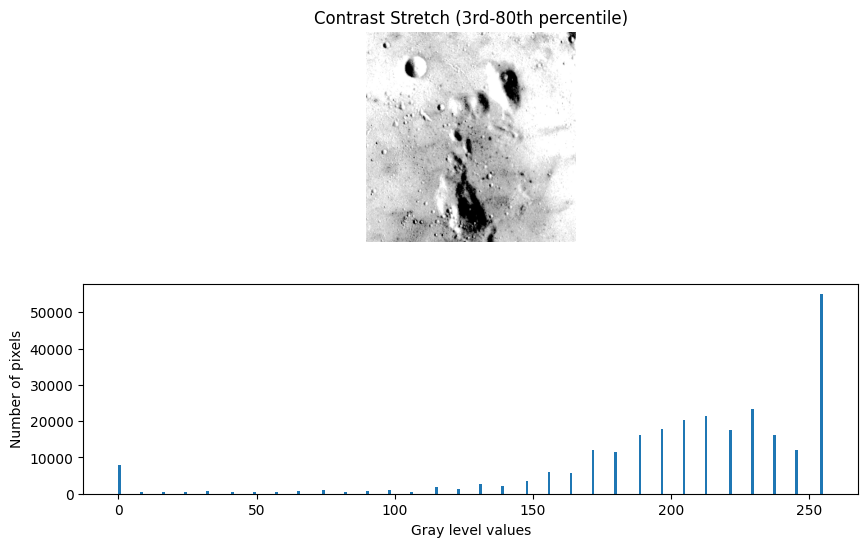

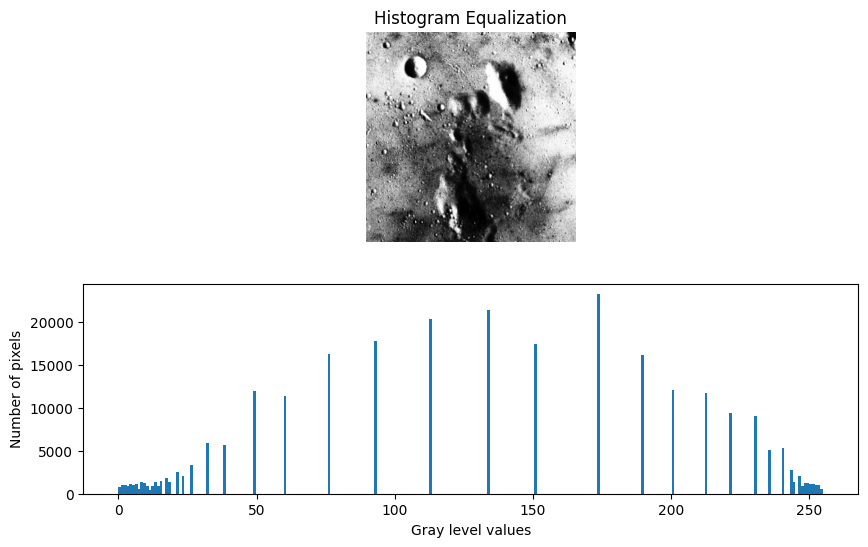

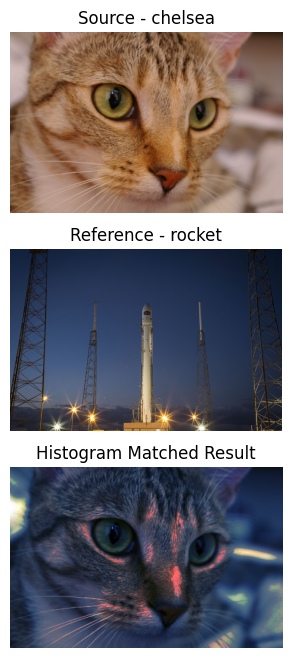

In [ ]:

#task 2 / histogram processing
img = cv2.imread("Images/moon.png", cv2.IMREAD_GRAYSCALE)

p3, p80 = np.percentile(img, (3, 80))

img_f = img.astype(np.float32)
img_rescale = (img_f - p3) * (255.0 / (p80 - p3))
img_rescale = np.clip(img_rescale, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(img_rescale, cmap="gray")
plt.title("Contrast Stretch (3rd-80th percentile)")
plt.axis("off")

plt.subplot(2, 1, 2)
plt.hist(img_rescale.flatten(), bins=256, range=(0, 255))
plt.xlabel("Gray level values")
plt.ylabel("Number of pixels")
plt.show()


#task 2 / histogram equalization
img_eq = cv2.equalizeHist(img)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.imshow(img_eq, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

plt.subplot(2, 1, 2)
plt.hist(img_eq.flatten(), bins=256, range=(0, 255))
plt.xlabel("Gray level values")
plt.ylabel("Number of pixels")
plt.show()



#task 3 / histogram matching
src = cv2.imread("Images/chelsea.png")   
ref = cv2.imread("Images/rocket.png")    

#histogram matching per channel
matched = np.zeros_like(src)
for ch in range(3):
    src_ch = src[:, :, ch].ravel()
    ref_ch = ref[:, :, ch].ravel()

    s_values, bin_idx, s_counts = np.unique(src_ch, return_inverse=True, return_counts=True)
    r_values, r_counts = np.unique(ref_ch, return_counts=True)

    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]

    r_quantiles = np.cumsum(r_counts).astype(np.float64)
    r_quantiles /= r_quantiles[-1]

    interp_r_values = np.interp(s_quantiles, r_quantiles, r_values)
    matched[:, :, ch] = interp_r_values[bin_idx].reshape(src[:, :, ch].shape).astype(np.uint8)

#display
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title("Schelsea")
plt.axis("off")

plt.subplot(3, 1, 2)
plt.imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
plt.title("rocket")
plt.axis("off")

plt.subplot(3, 1, 3)
plt.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
plt.title("histogram result")
plt.axis("off")

plt.show()